# Template Removal
In this nb, we'll try to use a negative template to leave only the fields of interest.

Sidenote: box pixel height: 75 px

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import cv2

Loading the image

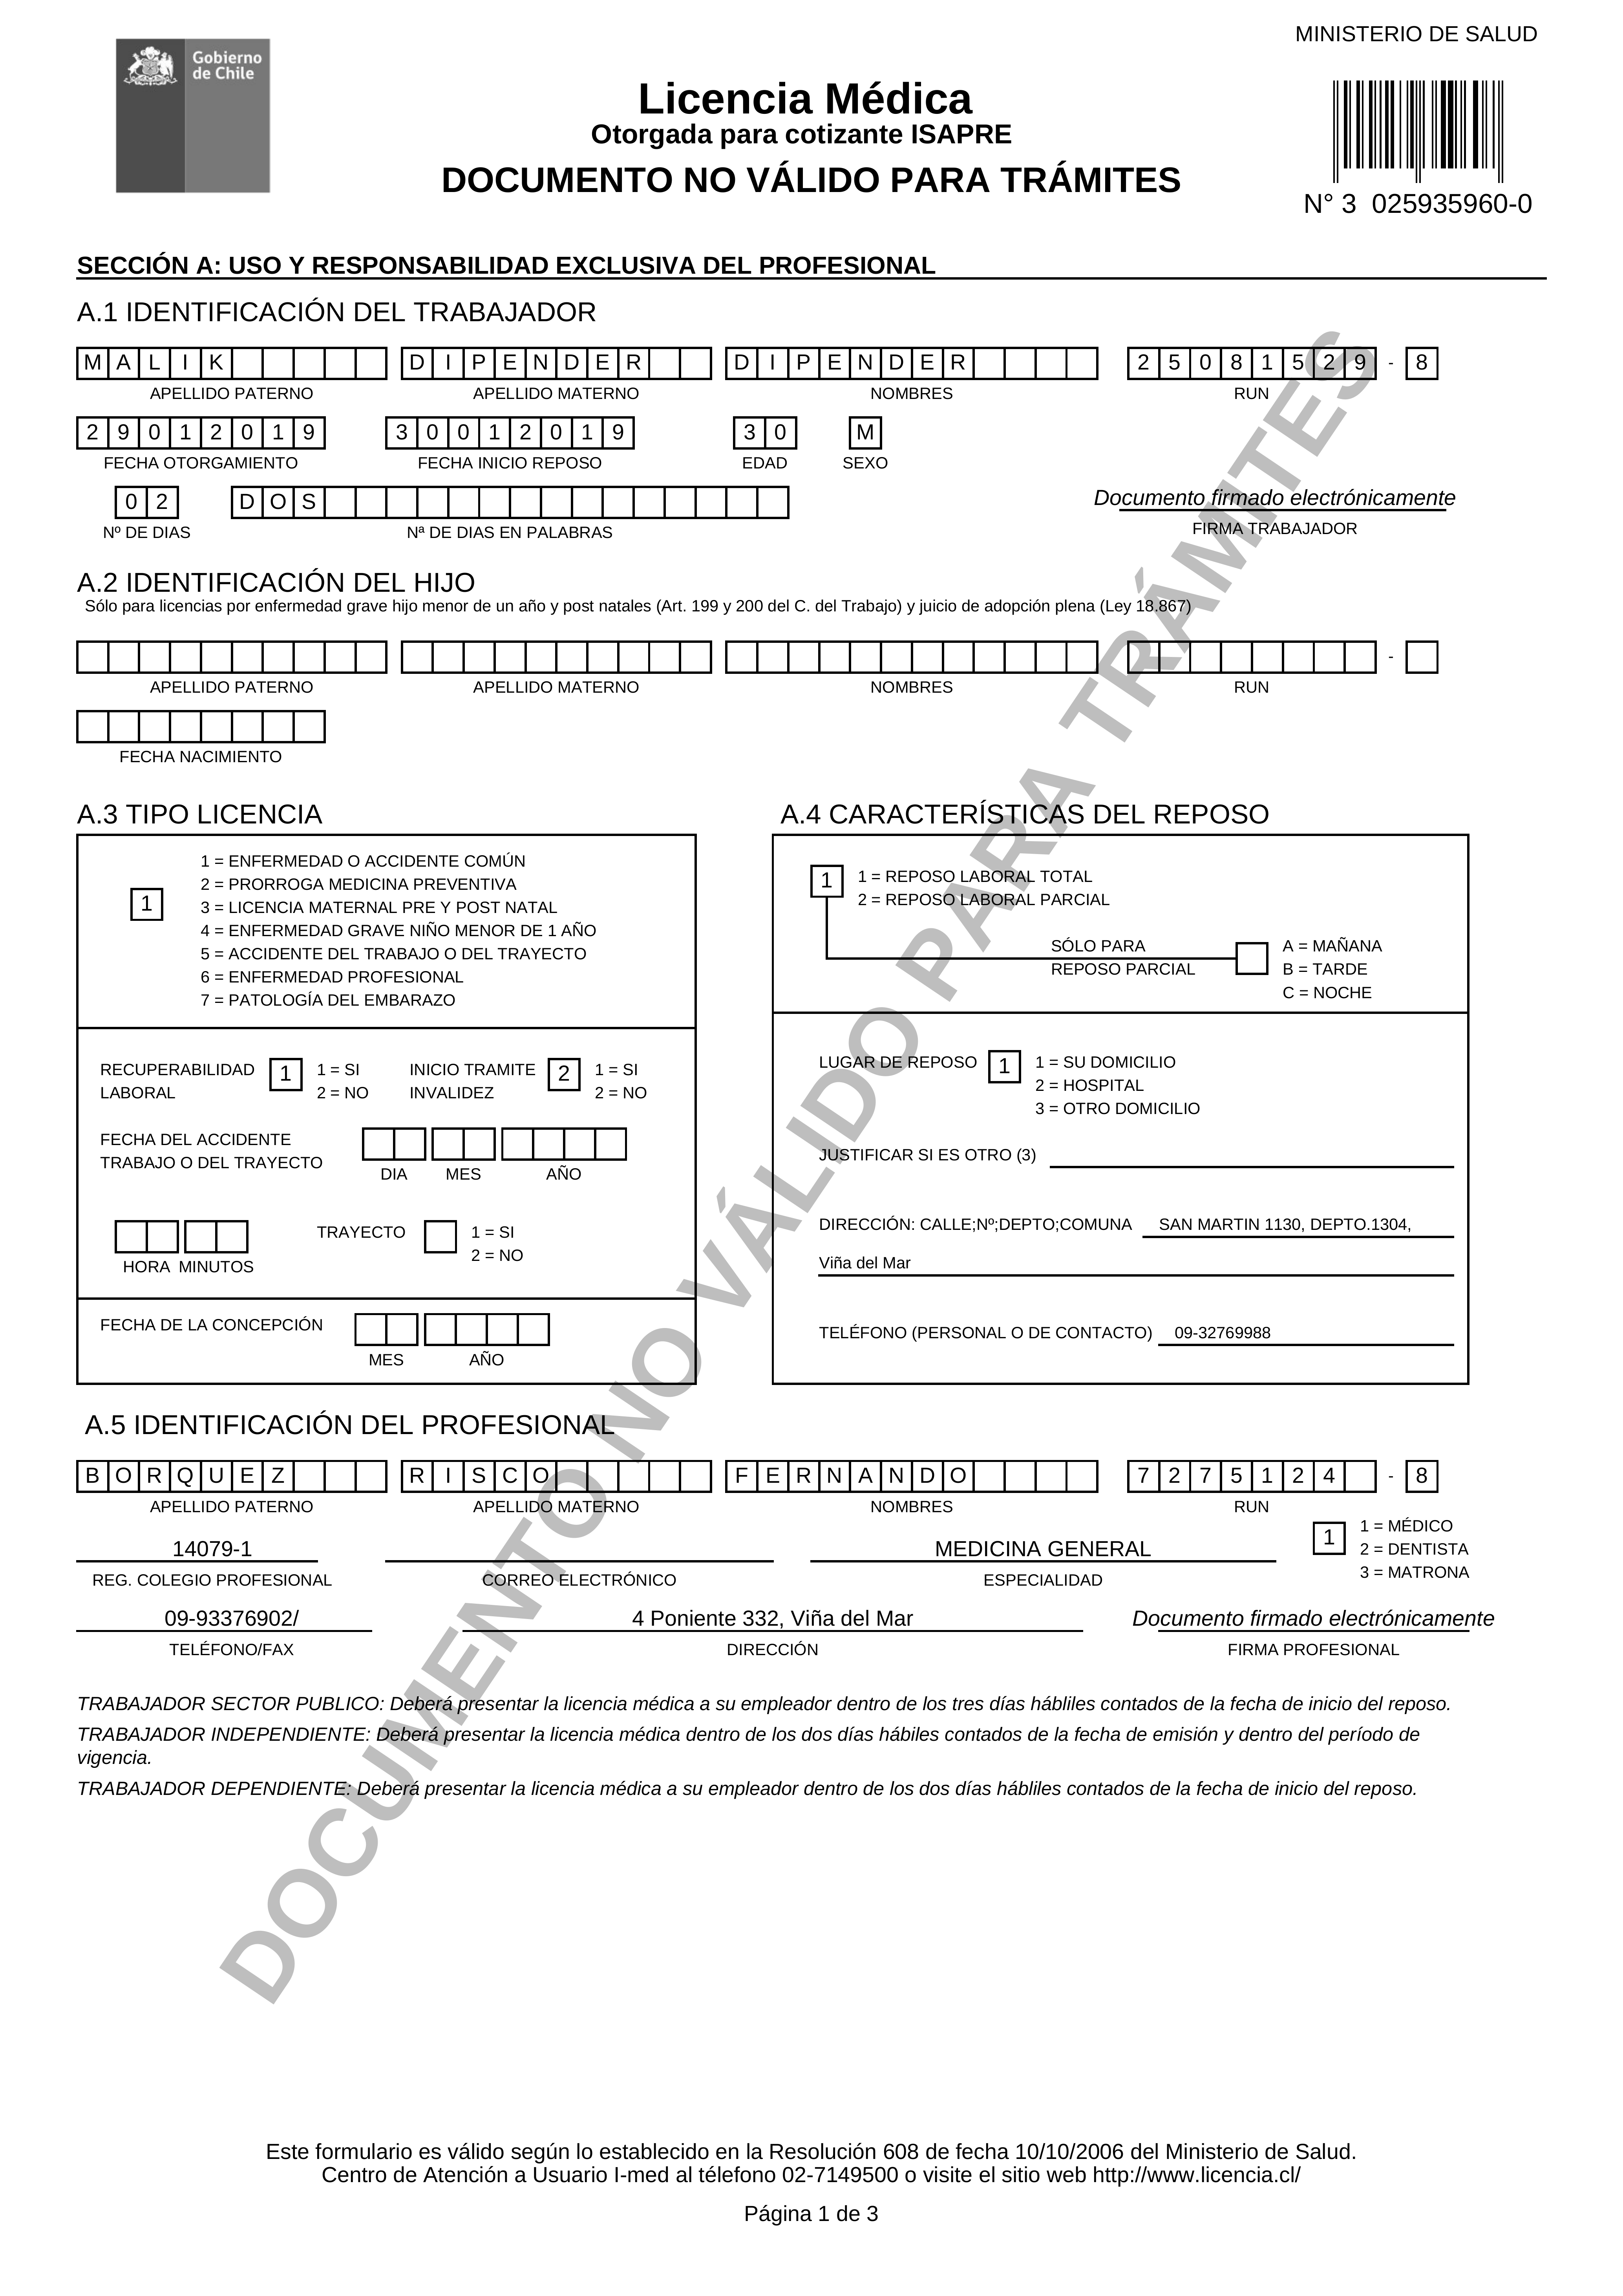

In [10]:
imgPath = "../output/"
temPath = "../templates/"
imgBName = "Medical_License"
imgName = imgBName + "0.png"
temName = imgBName + "_template.png"

img = cv2.imread(imgPath + imgName)
template = cv2.imread(temPath + temName)

Image.open(imgPath + imgName)

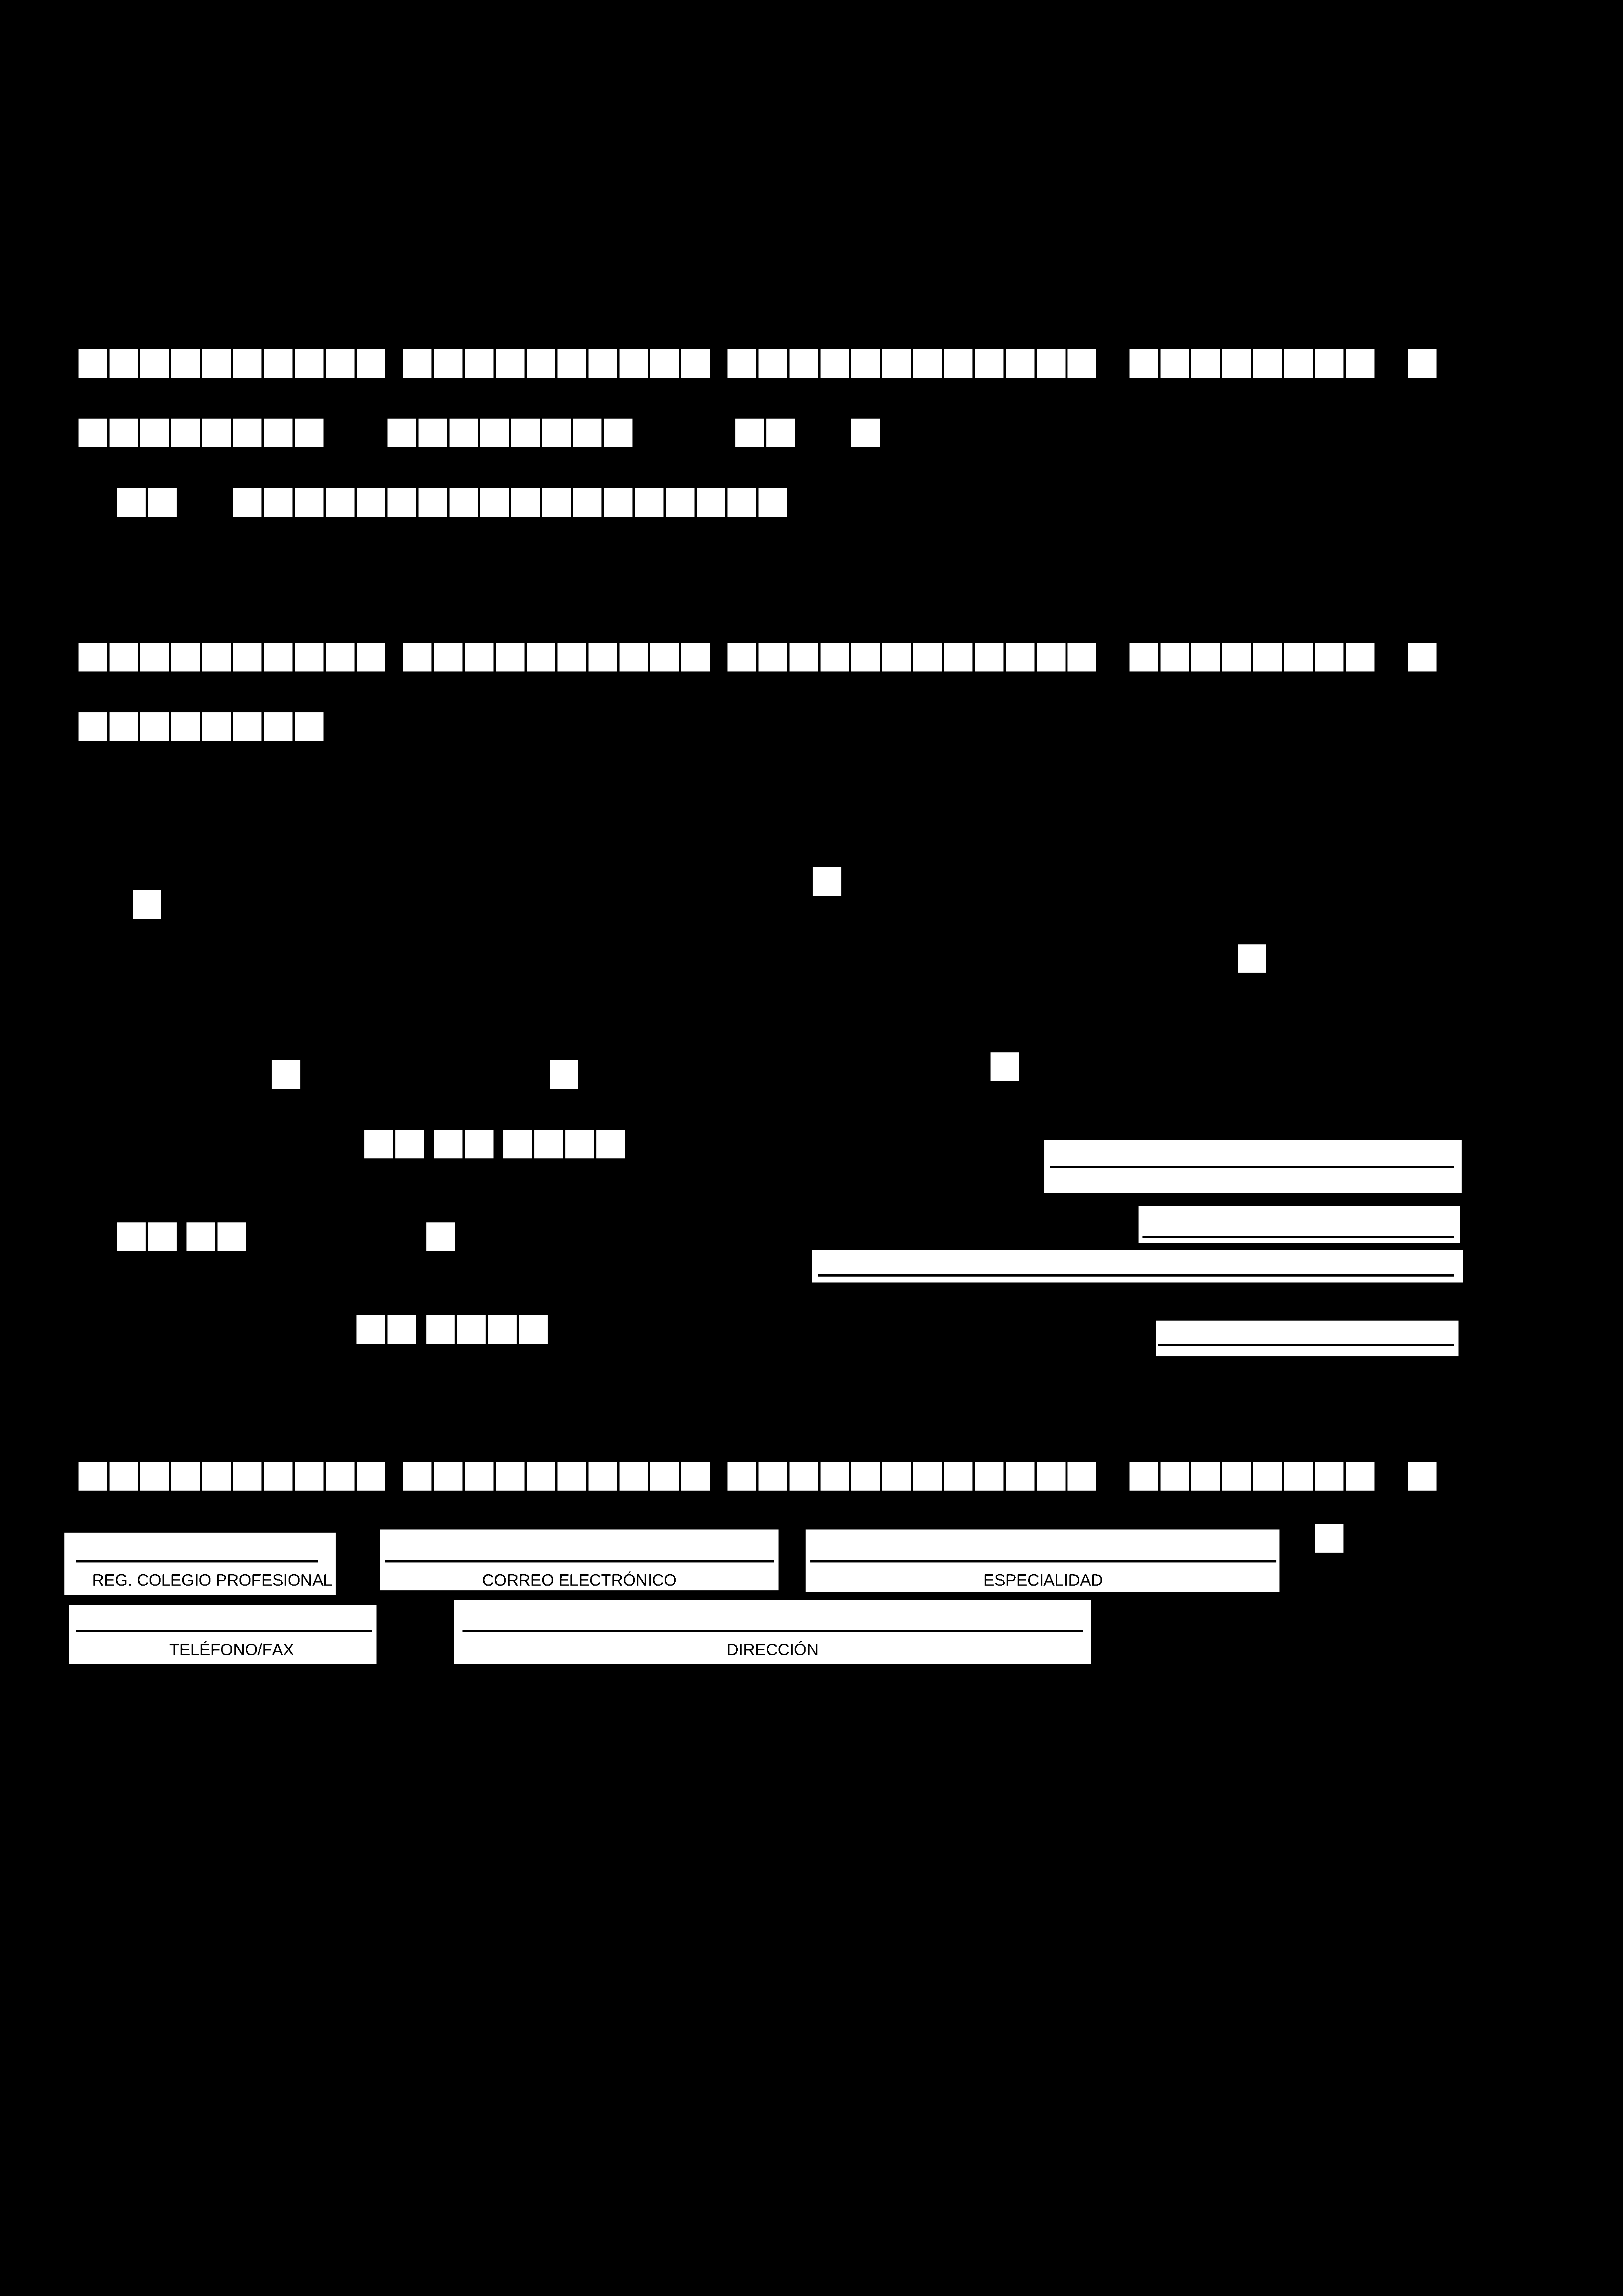

In [3]:
Image.open(temPath + temName)

In [4]:
print(img.shape)
print(template.shape)

(5847, 4134, 3)
(5847, 4134, 3)


Now, we'll subtract the template

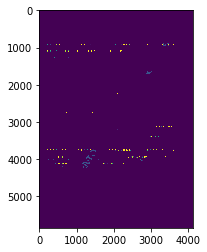

In [5]:
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

(thresh, template_bin) = cv2.threshold(template, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
(thresh, img_bin) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

sub_img = cv2.bitwise_and(img, template)

plt.imshow(sub_img)

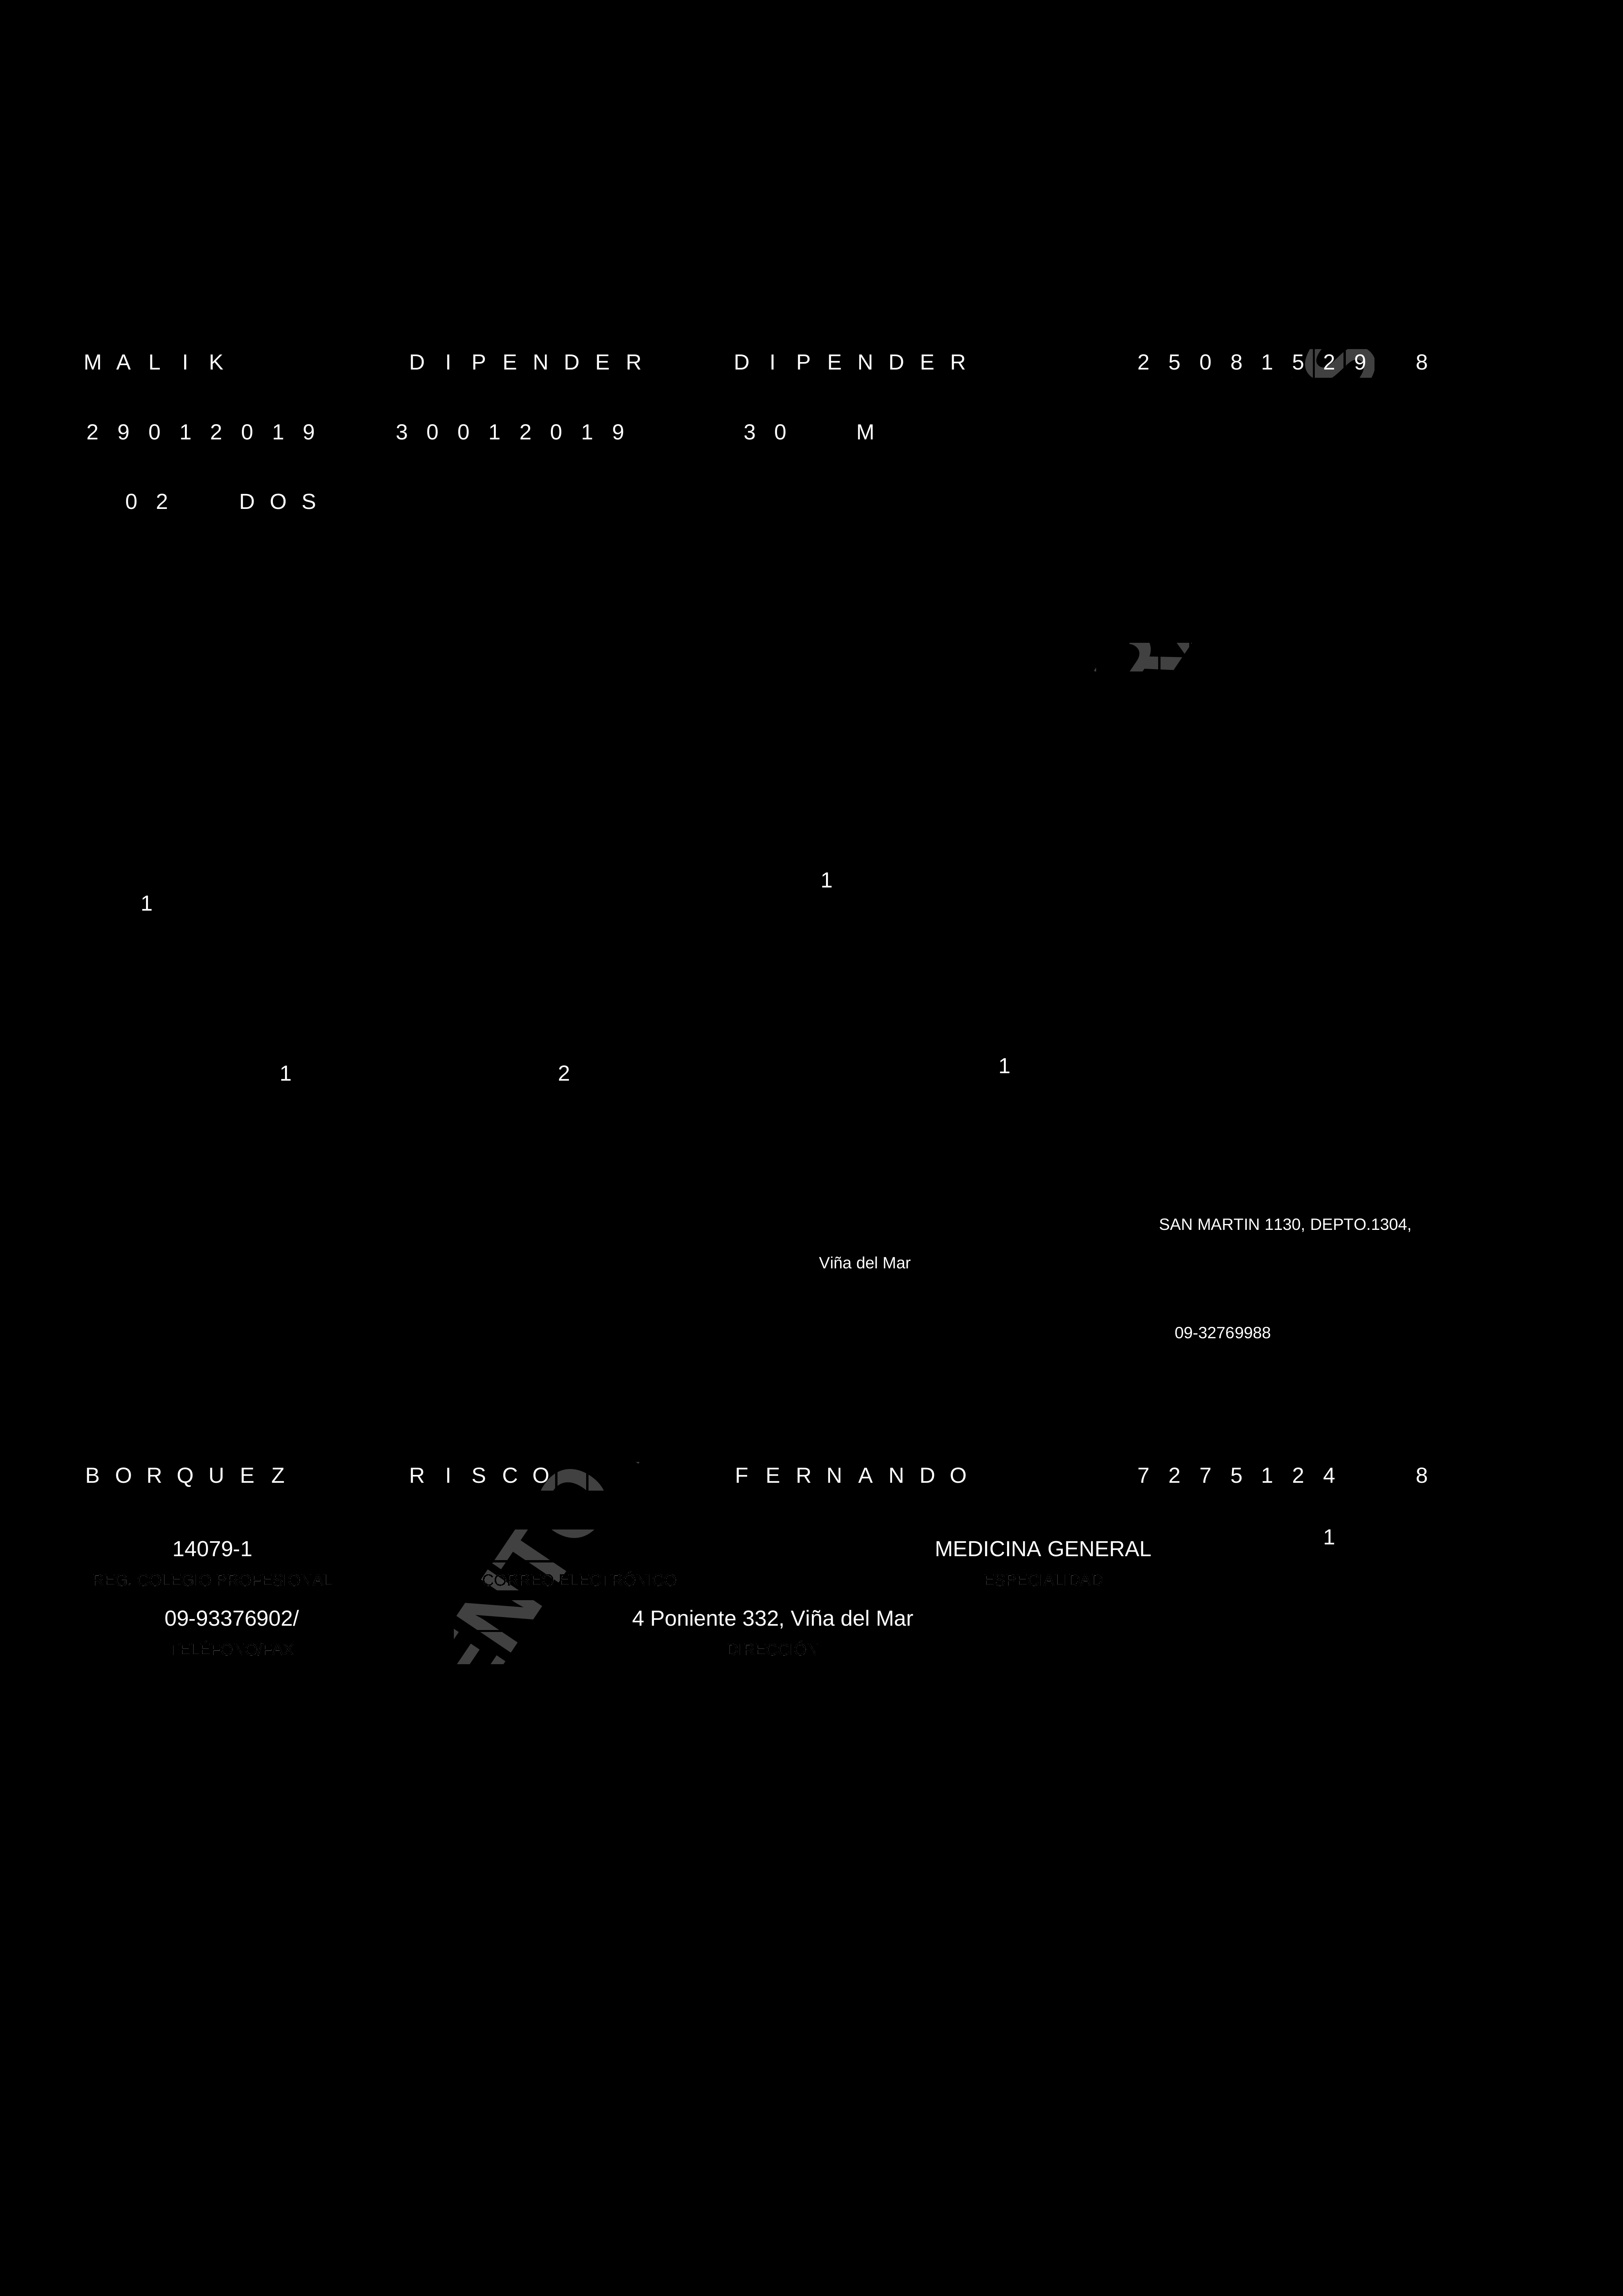

In [6]:
outIm_fp = "../output/ML_fields_only.png"
cv2.imwrite(outIm_fp, sub_img)
Image.open(outIm_fp)

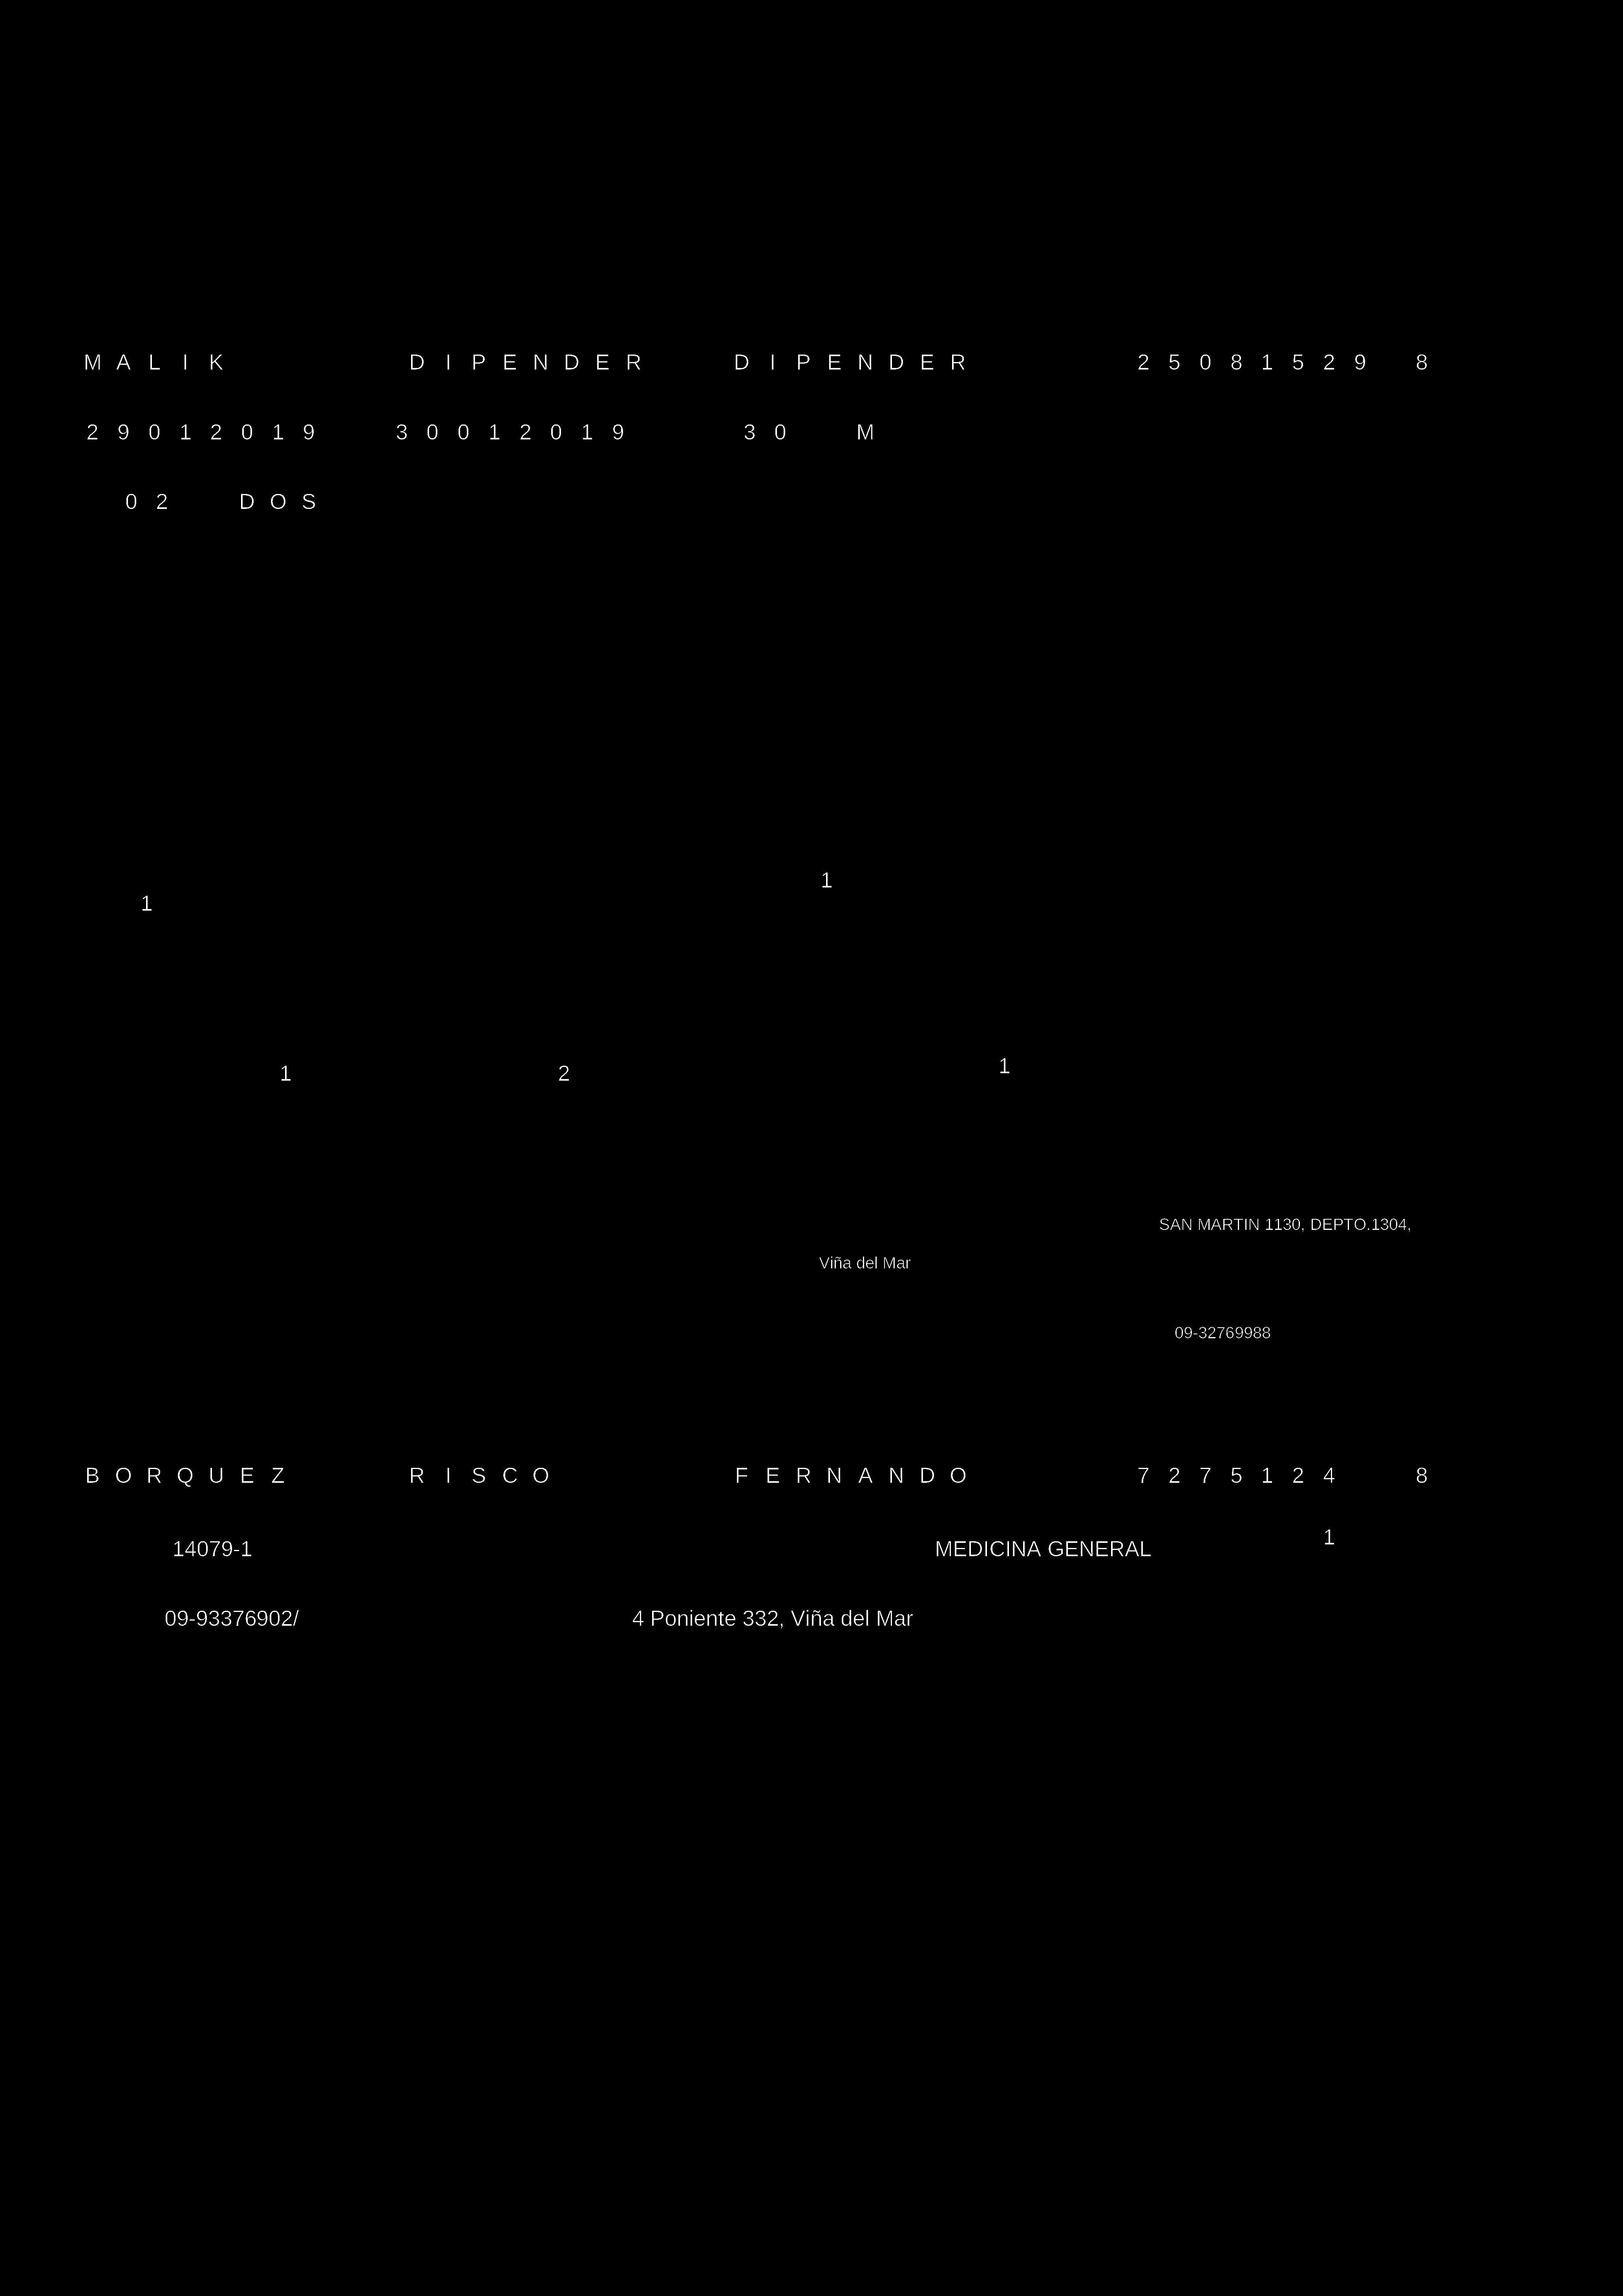

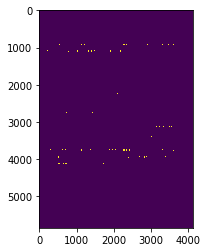

In [12]:
sub_img[sub_img < 255] = 0
plt.imshow(sub_img)
test_fp = "../output/manua_filter.png"
cv2.imwrite(test_fp, sub_img)
Image.open(test_fp)

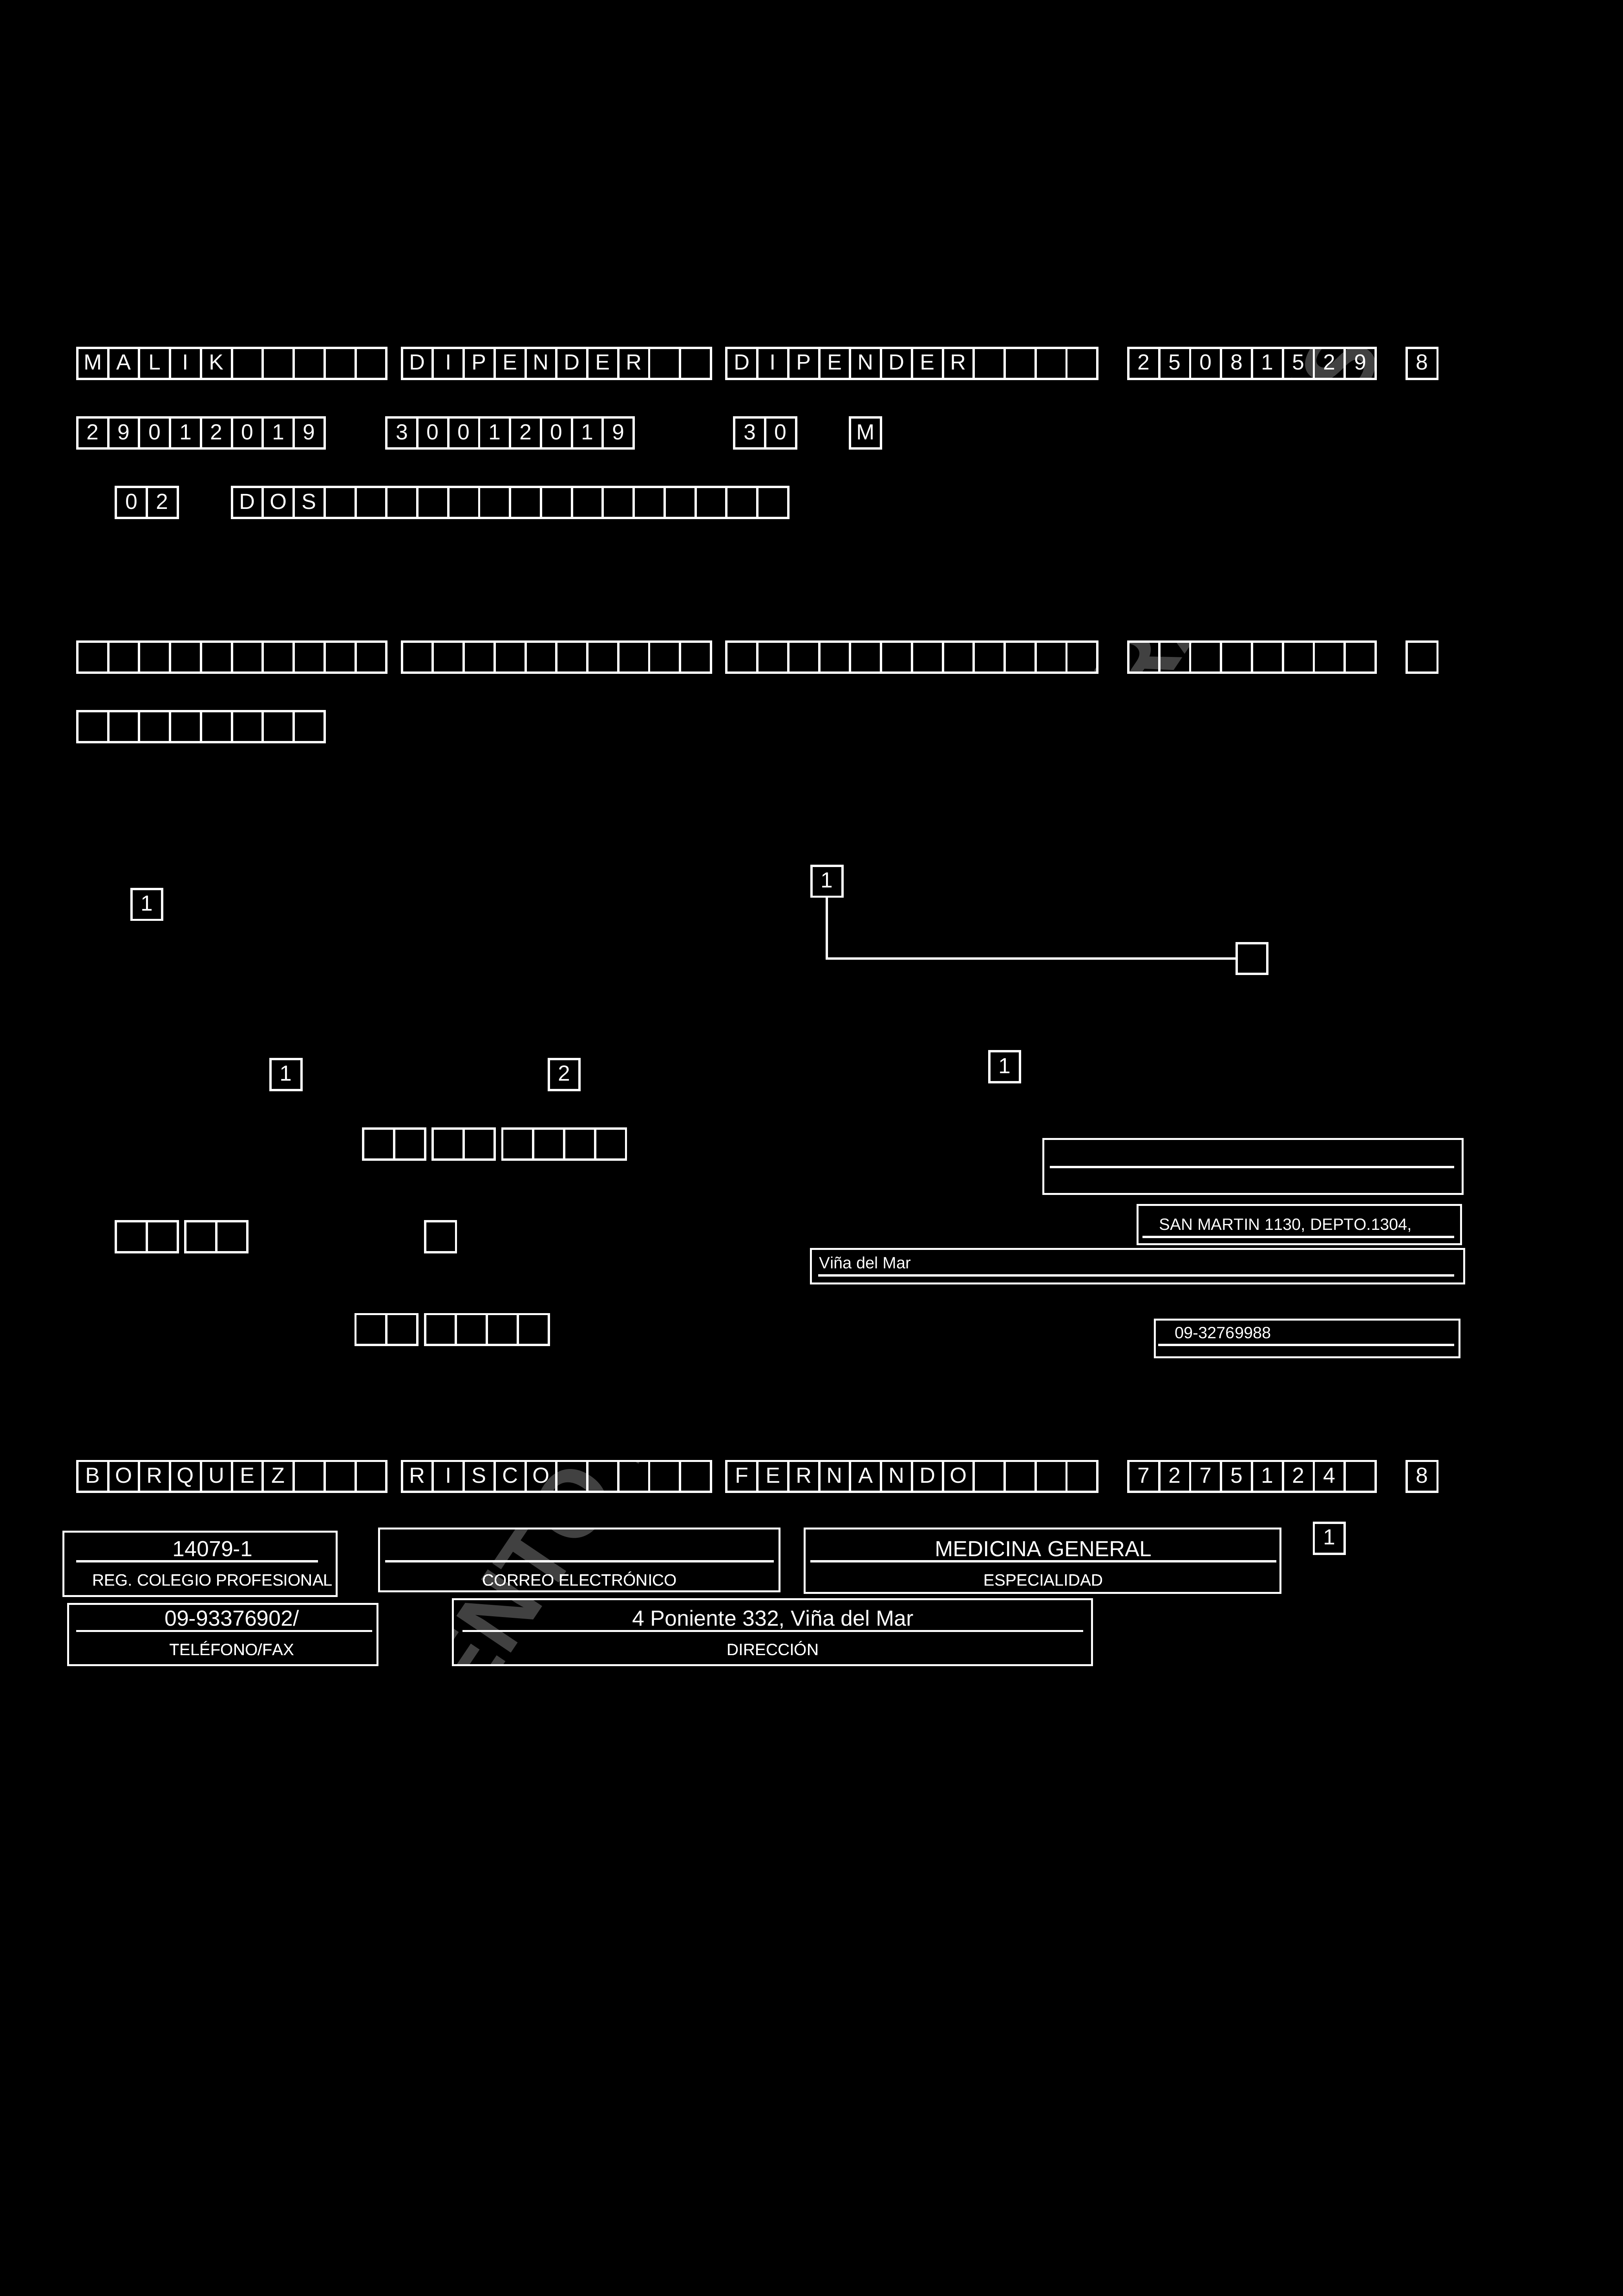

In [11]:
rois = cv2.imread("../templates/Medical_License_white_roi.png")
rois = cv2.cvtColor(rois, cv2.COLOR_BGR2GRAY)
(thresh, rois_bin) = cv2.threshold(rois, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
test = cv2.bitwise_xor(sub_img, rois_bin)
xor_image_fp = "../output/ML_xor.png"
cv2.imwrite(xor_image_fp, test)
Image.open(xor_image_fp)

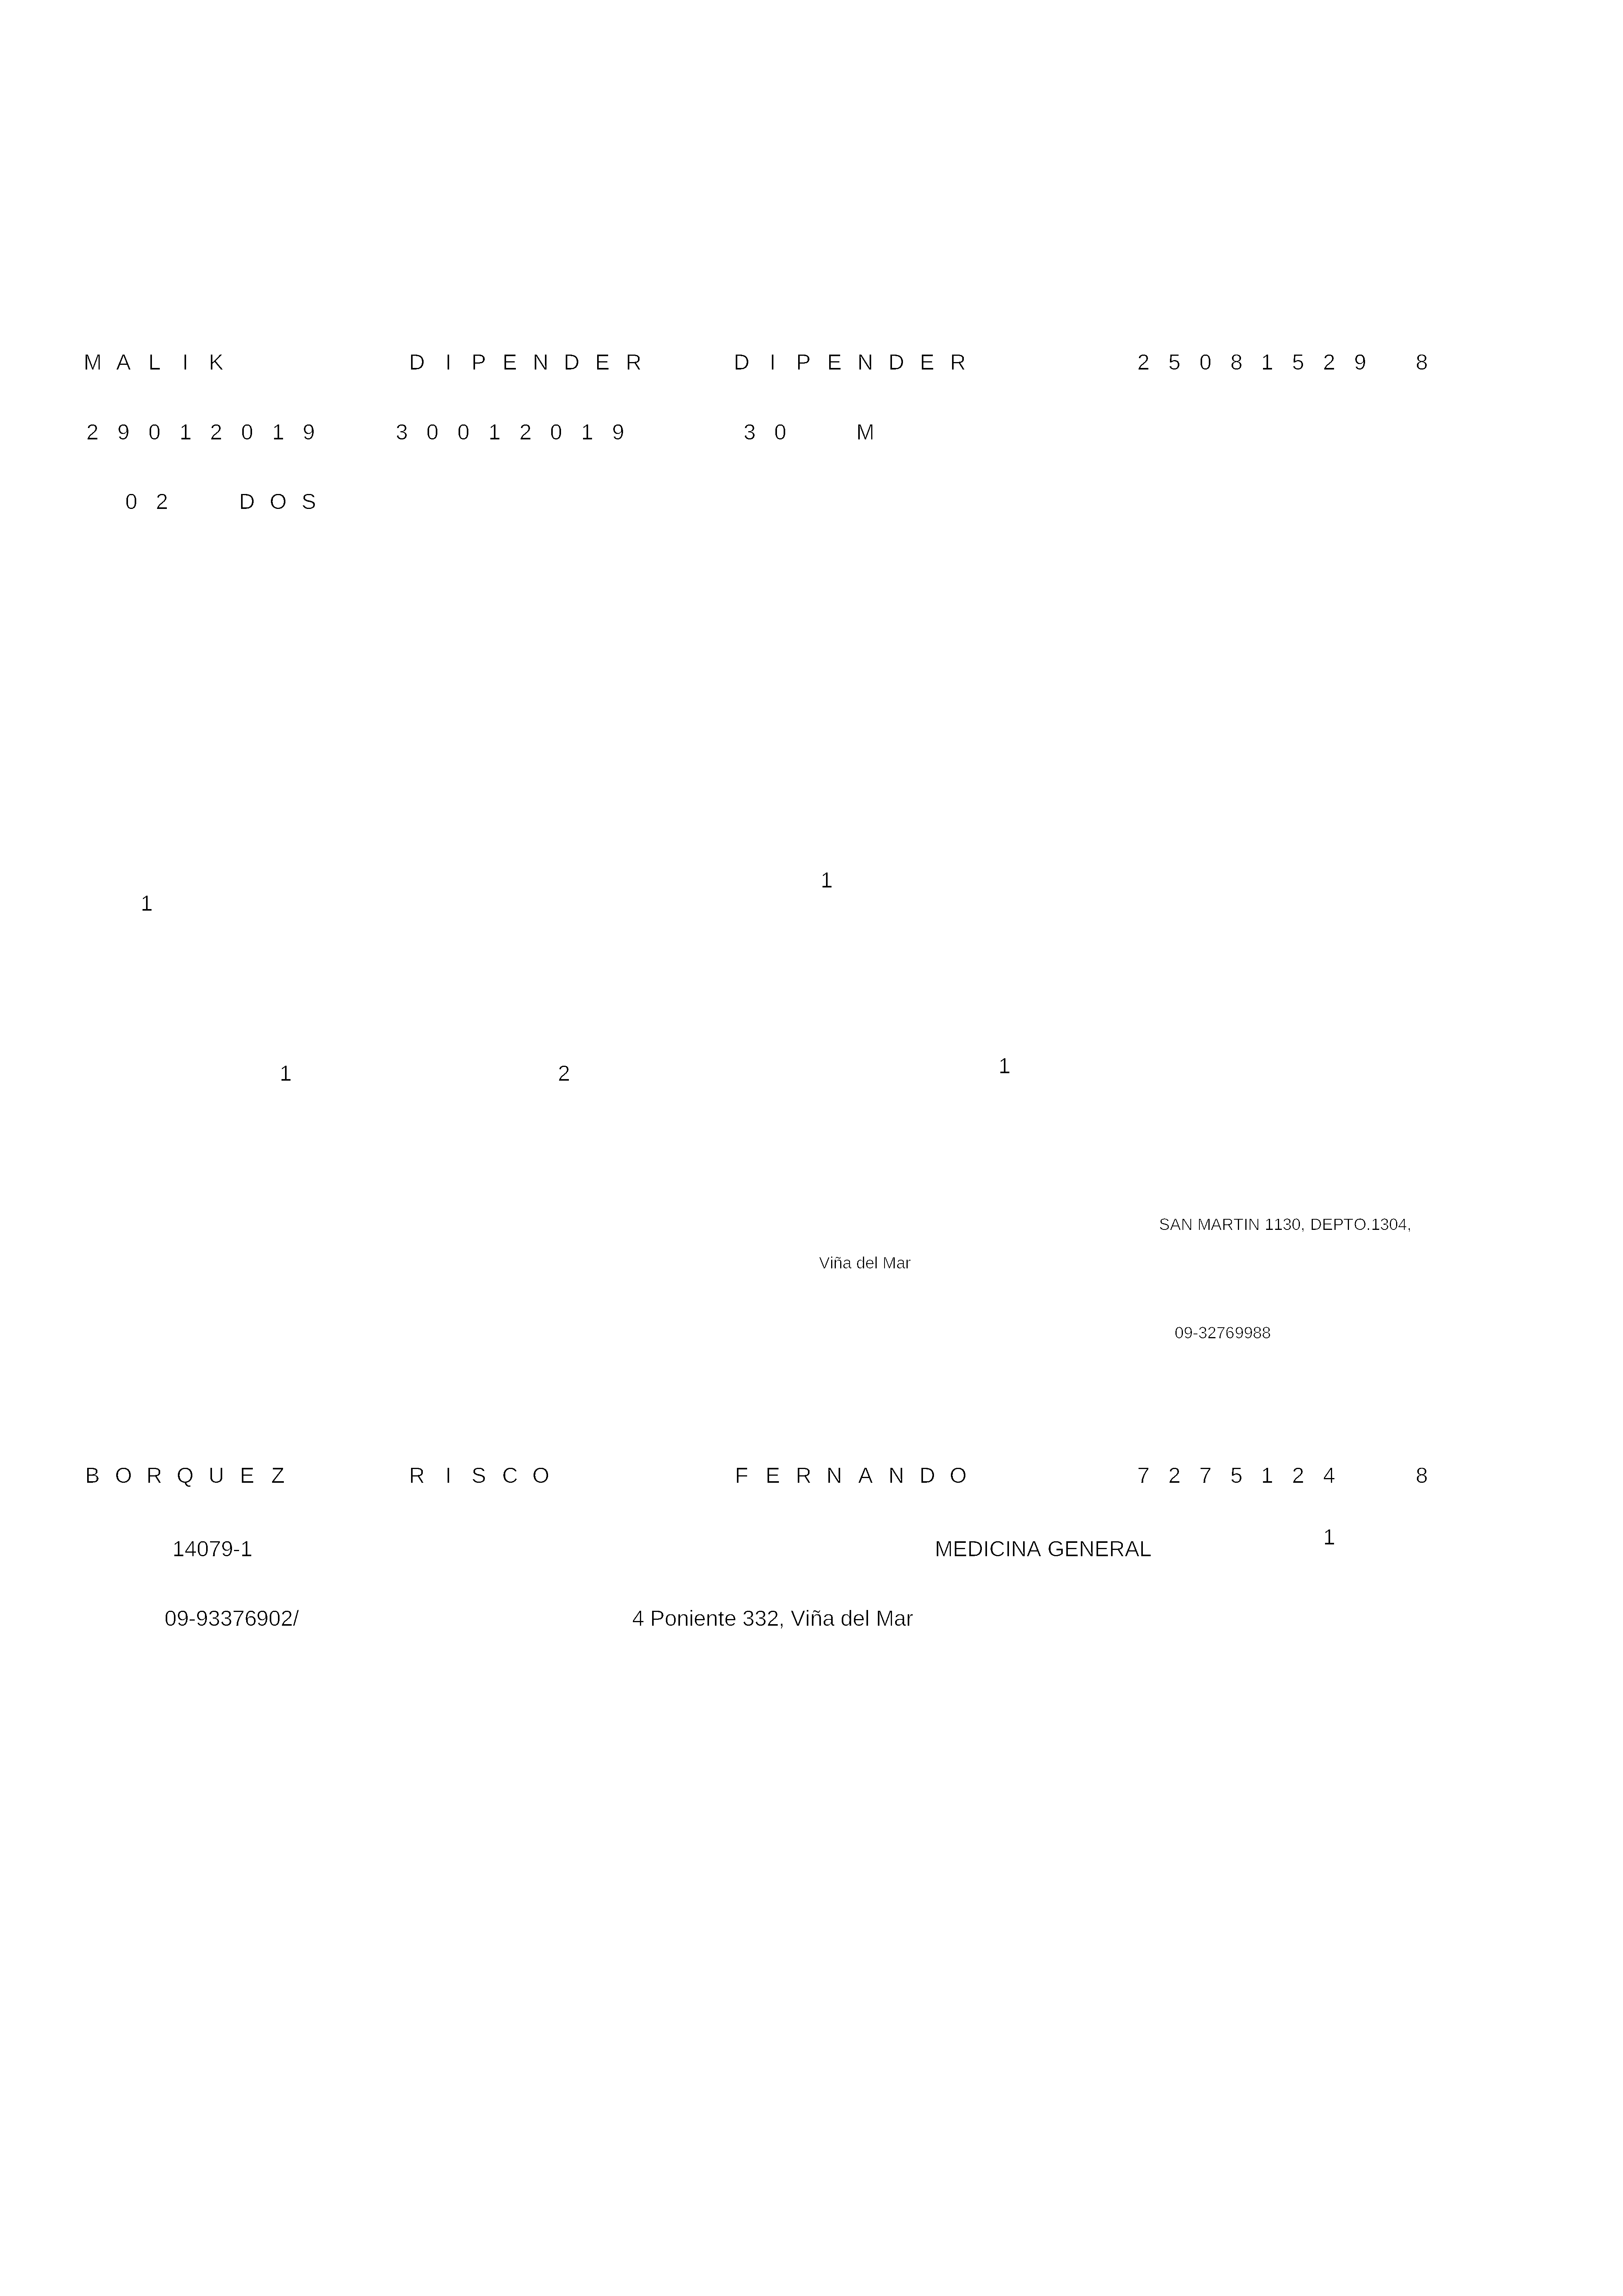

In [13]:
inv = sub_img
horizontal_img = inv.copy()
vertical_img = inv.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (75, 1))
horizontal_img = cv2.erode(horizontal_img, kernel, iterations=1)
horizontal_img = cv2.dilate(horizontal_img, kernel, iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 75))
vertical_img = cv2.erode(vertical_img, kernel, iterations=1)
vertical_img = cv2.dilate(vertical_img, kernel, iterations=1)

mask_img = horizontal_img + vertical_img
no_border = np.bitwise_or(cv2.bitwise_not(inv), mask_img)

no_lines_fp = "../output/ML_no_lines.png"
cv2.imwrite(no_lines_fp, no_border)
Image.open(no_lines_fp)

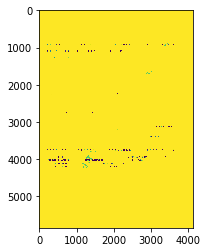

In [22]:
no_border = cv2.imread(no_lines_fp, cv2.IMREAD_GRAYSCALE)
plt.imshow(no_border)

TypeError: Image data cannot be converted to float

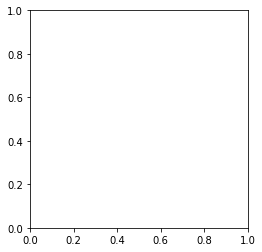

In [23]:
gray = cv2.threshold(no_border, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(gray)

In [14]:
text = pytesseract.image_to_string(no_border)
print(text)

MA L IK DIlIPEN DER DIPEN DER 2590815 2 9

29012 01 9 30012 01 9 3 0 M
0 2 DOS
1
1
1 2 1
SAN MARTIN 1130, DEPTO.1304,
Vifhia del Mar
09-32769988
BORQUEZ RISCcoO FERNANDO ~ 2 75 12 4
14079-1 MEDICINA GENERAL 1

09-93376902/ A Poniente 332, Viha del Mar
